In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import meteva.base as meb
import meteva.method as mem
import meteva.product as mpd
import numpy as np
import datetime
import copy
import matplotlib.pyplot as plt
import time
import pandas as pd
import math
import matplotlib as mpl
import os

In [2]:
clev1,cmap1 = meb.tool.color_tools.clev_cmap_rain_1h()
clev24,cmap24 = meb.tool.color_tools.clev_cmap_rain_24h()
dir_m4 = r"G:\radar_hybird_china\qpe_2s\001h\data\YYMMDDHH.bt.txt"
dir_micaps_rain = r"L:\wuhan_data\micaps\rain01\YYMMDDHH.TTT"
dir_png =r"G:\radar_hybird_china\qpe_2s_png\001h\data\YYMMDDHH.bt.png"
times = datetime.datetime(2019,4,30,1,0)
time0 = times
timee=datetime.datetime(2019,4,3,1,0)

In [3]:
while time0 <= timee:
    dir1 = meb.tool.path_tools.get_path(dir_m4,time0)
    grd_r = meb.read_griddata_from_micaps4(dir1)
    if grd_r is not None:
        meb.set_griddata_coords(grd_r,gtime = [time0],member_list = ["qpe_2s"])
        grd_r.name = "rain01"
        path_png = meb.tool.path_tools.get_path(dir_png,time0)
        #print(grd_r)
        meb.tool.plot_tools.contourf_2d_grid(grd_r,clevs = clev1,cmap = cmap1,save_path = path_png)
    time0 = time0 + datetime.timedelta(hours=1)

In [4]:
cmap = meb.color_tools.get_cmap_from_picture("H:/b.png")
colors0 = np.array(cmap.colors).tolist()
colors1 = [[1,1,1]]
colors1.extend(colors0)
colors1.append([0,0,0])
cmap1 = mpl.colors.ListedColormap(colors1, 'indexed')
clevs = [0,5,10,15,20,25,30,35,40,45,50,55,60]

最大值位于
id:686100   lon:115.915  lat:36.793 value:20.0


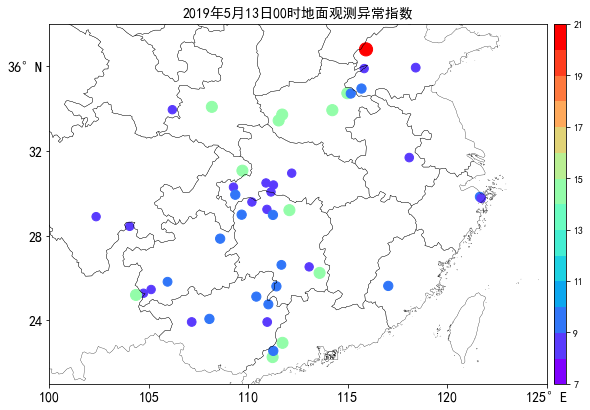

In [5]:
grid_plot = meb.grid([100,125,0.05],[21,38,0.05])
qc_index = meb.read_stadata_from_micaps3(r"G:\radar_hybird_china\test\qc_index19051300.txt")
qc_index = meb.in_grid_xy(qc_index,grid_plot)
qc_index = meb.between_value_range(qc_index,8,40)
meb.tool.plot_tools.scatter_sta(qc_index,grid_plot,save_path= r"G:\radar_hybird_china\test\qc_index.png",
                                title="2019年5月13日00时地面观测异常指数",fix_size=False,show = True)

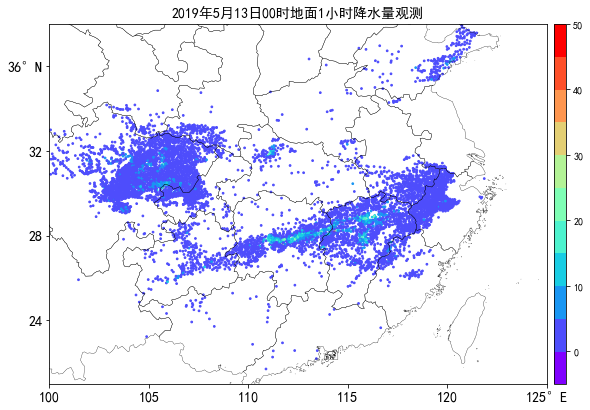

In [6]:
rain01 = meb.read_stadata_from_micaps3(r"V:\autorun\data_all\001h\2019051300.000.001h")
rain01 = meb.in_grid_xy(rain01,grid_plot)
rain01 = meb.between_value_range(rain01,0.01,100)
meb.tool.plot_tools.scatter_sta(rain01,grid_plot,save_path= r"G:\radar_hybird_china\test\rain01.png",
                                title="2019年5月13日00时地面1小时降水量观测",fix_size=True,show = True)

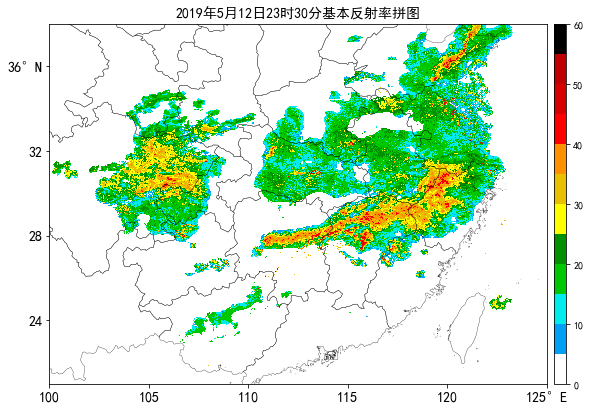

In [7]:
path= r"G:\radar_hybird_china\201905\1905122330.bt.nc"
grid_plot = meb.grid([100,125,0.01],[21,38,0.01])
grd_dbz = meb.read_griddata_from_nc(path,grid=grid_plot)
grd_dbz.values[np.isnan(grd_dbz.values)] =0
meb.plot_tools.pcolormesh_2d_grid(grd_dbz,save_path=  r"G:\radar_hybird_china\test\dbz.png",
                                title="2019年5月12日23时30分基本反射率拼图",clevs= clevs,cmap= cmap1,show = True)

s:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


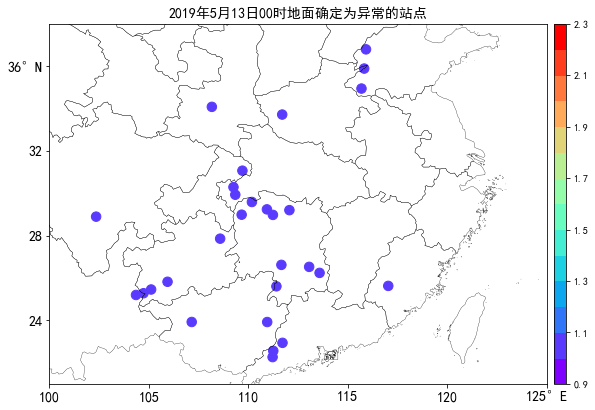

In [8]:
grid05 = meb.grid([100,125,0.05],[21,38,0.05])
grd_dbz_05 = meb.interp_gg_linear(grd_dbz,grid05)
grd_dbz_05s = meb.smooth(grd_dbz_05)
sta_dbz = meb.interp_gs_linear(grd_dbz_05s,qc_index)
dat1 = qc_index.loc[:,"data0"]
dat2 = sta_dbz.loc[:,"data0"]
index = np.where((dat1 >20) | (dat2 < -30))[0]
sta_qc = qc_index.iloc[index,:]
sta_qc.loc[:,"data0"] = 1
meb.tool.plot_tools.scatter_sta(sta_qc,grid_plot,save_path= r"G:\radar_hybird_china\test\qc_sta.png",
                                title="2019年5月13日00时地面确定为异常的站点",fix_size=True,show = True)

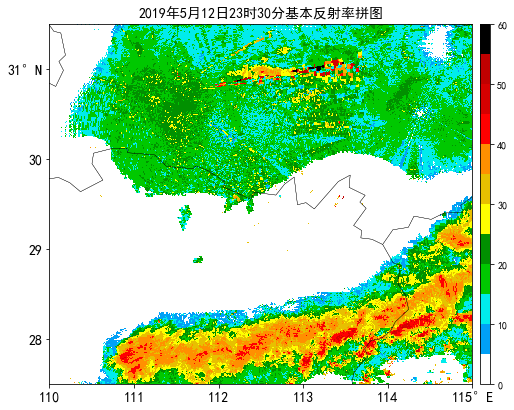

In [9]:
grid_qc =  meb.grid([110,115,0.01],[27.5,31.5,0.01])
grd_dbz_qc = meb.interp_gg_linear(grd_dbz,grid_qc)
meb.plot_tools.pcolormesh_2d_grid(grd_dbz_qc,save_path= r"G:\radar_hybird_china\test\radar_0.png",
                                title="2019年5月12日23时30分基本反射率拼图",clevs= clevs,cmap= cmap1,show = True)

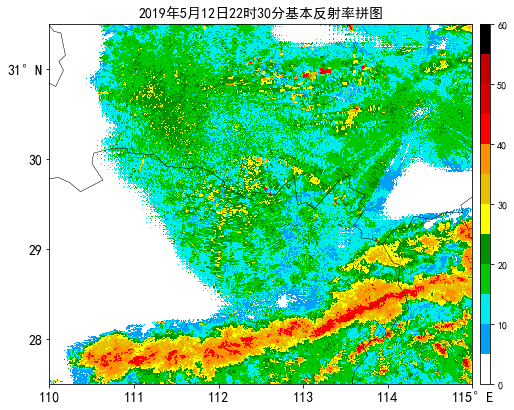

In [10]:
path= r"G:\radar_hybird_china\201905\1905122230.bt.nc"
grid_qc =  meb.grid([110,115,0.01],[27.5,31.5,0.01])
grd_dbz1 = meb.read_griddata_from_nc(path,grid=grid_qc)
grd_dbz1.values[np.isnan(grd_dbz1.values)] =0
meb.plot_tools.pcolormesh_2d_grid(grd_dbz1,save_path= r"G:\radar_hybird_china\test\radar_1.png",
                                title="2019年5月12日22时30分基本反射率拼图",clevs= clevs,cmap= cmap1,show = True)

In [11]:
import meteva
def max_grds(grd):
    grid0 = meteva.base.get_grid_of_data(grd)
    dat = grd.values.squeeze()
    dx1 = np.abs(dat[:,1:] - dat[:,:-1])
    dy1 = np.abs(dat[1:,:] - dat[:-1,:])
    dx = np.maximum(dx1[:,1:],dx1[:,:-1])
    dy = np.maximum(dy1[1:,:],dy1[:-1,:])
    grds = np.zeros((grid0.nlat,grid0.nlon))
    grds[1:-1,1:-1] = np.maximum(dx[1:-1,:],dy[:,1:-1])
    grds_1 = meteva.base.grid_data(grid0,grds)
    return grds_1

In [12]:
dat1 = grd_dbz_qc.values
dat1[dat1<0] = 0
grd_dbz_grad = meb.grid_data(grid_qc,dat1)
grds = max_grds(grd_dbz_grad)

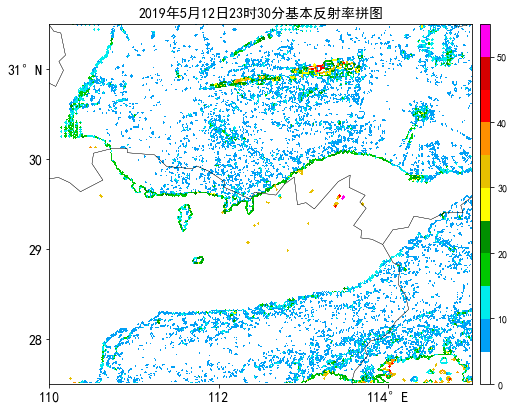

In [13]:
meb.plot_tools.pcolormesh_2d_grid(grds,save_path=  r"G:\radar_hybird_china\test\grads.png",
                                title="2019年5月12日23时30分基本反射率拼图",clevs= clevs,cmap= cmap1,show = True)

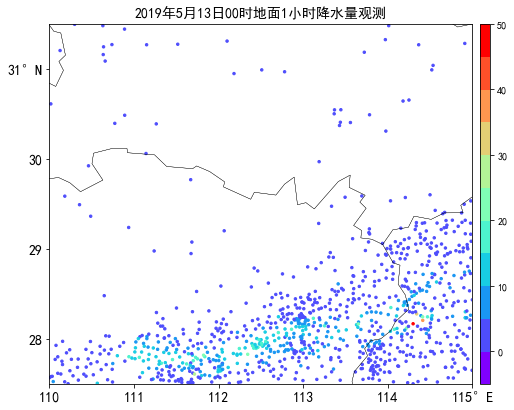

In [14]:
rain01_qc = meb.in_grid_xy(rain01,grid_qc)
save_path = r"G:\radar_hybird_china\test\rain01.png"
meb.tool.plot_tools.scatter_sta(rain01_qc,grid_qc,save_path=None,
                                title="2019年5月13日00时地面1小时降水量观测")

In [15]:
sta_qced = meb.read_stadata_from_micaps3(r"G:\radar_hybird_china\test\staq19051300.000")
qpe_sta =meb.interp_sg_idw(sta_qced, grid_qc)

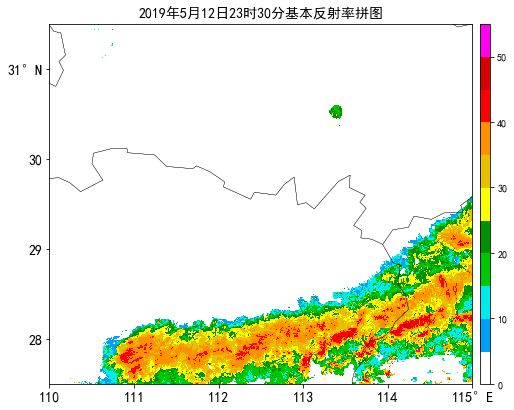

In [16]:
has_rain = np.zeros(qpe_sta.values.shape)
has_rain[qpe_sta.values > 0.1] = 1
dat = grd_dbz_qc.values * has_rain
grd_dbz_qced = meb.grid_data(grid_qc,dat)
meb.plot_tools.pcolormesh_2d_grid(grd_dbz_qced,save_path=  r"G:\radar_hybird_china\test\dbz_qced.png",
                                title="2019年5月12日23时30分基本反射率拼图",clevs= clevs,cmap= cmap1,show = True)

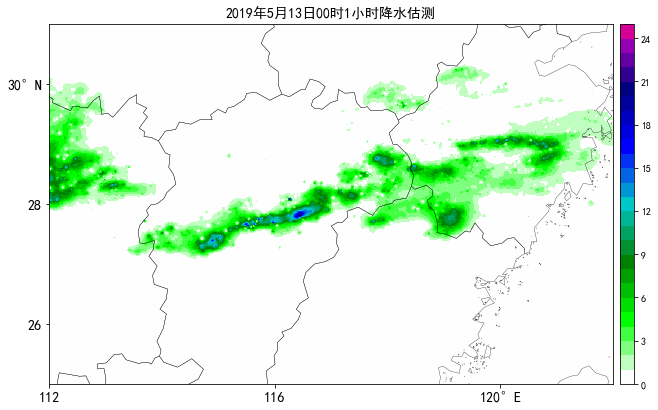

In [17]:
clev1,cmap1 = meb.tool.color_tools.clev_cmap_rain_1h()
qpe_2s = meb.read_griddata_from_nc(r"G:\radar_hybird_china\qpe_2s\001h_v1\19051308.bt.nc")
meb.plot_tools.pcolormesh_2d_grid(qpe_2s,save_path=  r"G:\radar_hybird_china\test\qpe_2s.png",
                                title="2019年5月13日00时1小时降水估测",clevs= clev1,cmap= cmap1,show = True)

In [80]:
times = datetime.datetime(2019,5,12,12,0)
time0 = times
timee=datetime.datetime(2019,5,13,12,0)
sta_ob_list = []
sta_idw_list = []
sta_2s_list = []
dir_ob = r"G:\radar_hybird_china\qc1\001h\YYYYMMDDHH.000"
dir_idw = r"G:\radar_hybird_china\qpe_radar\eidw_YYMMDDHH.txt"
dir_2s = r"G:\radar_hybird_china\qpe_radar\eqs_YYMMDDHH.txt"
rain24 = None
err24 = None
while time0 <= timee:
    path = meb.get_path(dir_ob,time0)
    print(path)
    sta = meb.read_stadata_from_micaps3(path)
    meb.set_stadata_coords(sta,time = time0)
    meb.set_stadata_names(sta,["ob"])
    sta_ob_list.append(sta)
    rain24 = meb.add_on_id(rain24,sta)
    
    path = meb.get_path(dir_idw,time0)
    print(path)
    sta = meb.read_stadata_from_micaps3(path)
    meb.set_stadata_coords(sta,time = time0)
    meb.set_stadata_names(sta,["e_idw"])
    sta_idw_list.append(sta)
    
    path = meb.get_path(dir_2s,time0)
    print(path)
    sta = meb.read_stadata_from_micaps3(path)
    meb.set_stadata_coords(sta,time = time0)
    meb.set_stadata_names(sta,["e_2s"])
    sta_2s_list.append(sta)
    err24 = meb.add_on_id(err24,sta)
    
    
    time0 += datetime.timedelta(hours = 1)
sta_ob_all = pd.concat(sta_ob_list,axis = 0)
sta_idw_all = pd.concat(sta_idw_list,axis = 0)
sta_2s_all = pd.concat(sta_2s_list,axis = 0)

G:\radar_hybird_china\qc1\001h\2019051212.000
G:\radar_hybird_china\qpe_radar\eidw_19051212.txt
G:\radar_hybird_china\qpe_radar\eqs_19051212.txt
G:\radar_hybird_china\qc1\001h\2019051213.000
G:\radar_hybird_china\qpe_radar\eidw_19051213.txt
G:\radar_hybird_china\qpe_radar\eqs_19051213.txt
G:\radar_hybird_china\qc1\001h\2019051214.000
G:\radar_hybird_china\qpe_radar\eidw_19051214.txt
G:\radar_hybird_china\qpe_radar\eqs_19051214.txt
G:\radar_hybird_china\qc1\001h\2019051215.000
G:\radar_hybird_china\qpe_radar\eidw_19051215.txt
G:\radar_hybird_china\qpe_radar\eqs_19051215.txt
G:\radar_hybird_china\qc1\001h\2019051216.000
G:\radar_hybird_china\qpe_radar\eidw_19051216.txt
G:\radar_hybird_china\qpe_radar\eqs_19051216.txt
G:\radar_hybird_china\qc1\001h\2019051217.000
G:\radar_hybird_china\qpe_radar\eidw_19051217.txt
G:\radar_hybird_china\qpe_radar\eqs_19051217.txt
G:\radar_hybird_china\qc1\001h\2019051218.000
G:\radar_hybird_china\qpe_radar\eidw_19051218.txt
G:\radar_hybird_china\qpe_radar\eq

In [22]:
sta_all = meb.combine_on_obTime_id(sta_ob_all,[sta_idw_all,sta_2s_all])

In [23]:
sta_all

,level,time,dtime,id,lon,lat,ob,e_idw,e_2s
0,0,2019-05-12 12:00:00,0,57377,112.212,30.993,0.0,0.0000,-0.0000
1,0,2019-05-12 12:00:00,0,57387,113.132,31.000,0.0,0.0000,-0.0000
2,0,2019-05-12 12:00:00,0,57475,112.904,30.401,0.0,0.0000,-0.0000
3,0,2019-05-12 12:00:00,0,57476,112.150,30.350,0.0,-0.0040,-0.0100
4,0,2019-05-12 12:00:00,0,57477,112.225,30.075,0.3,0.2615,0.2307
5,0,2019-05-12 12:00:00,0,57481,113.567,30.950,0.0,0.0000,0.0000
6,0,2019-05-12 12:00:00,0,57482,113.950,30.900,0.0,0.0000,0.0000
7,0,2019-05-12 12:00:00,0,57483,113.134,30.669,0.0,0.0000,-0.0000
8,0,2019-05-12 12:00:00,0,57484,112.549,30.736,0.0,0.0000,-0.0000
9,0,2019-05-12 12:00:00,0,57485,113.467,30.283,0.0,0.0000,0.0000


In [26]:
idlist = list(set(sta_all.loc[:,"id"].values.tolist()))
nid = len(idlist)

In [42]:
value_list =[]
for i in range(nid):
    sta_one_id = meb.in_id_list(sta_all,[idlist[i]])
    max_rain = np.max(sta_one_id.loc[:,"ob"].values)
    sum_rain = np.sum(sta_one_id.loc[:,"ob"].values)
    if(sum_rain > 30 and max_rain >20):
        sum_mae_2s = np.sum(np.abs(sta_one_id.loc[:,"e_2s"].values))
        sum_mae_idw = np.sum(np.abs(sta_one_id.loc[:,"e_idw"].values))
        value_list.append([idlist[i],sum_rain,sum_mae_2s,sum_mae_idw])

In [43]:
v_array = np.array(value_list)

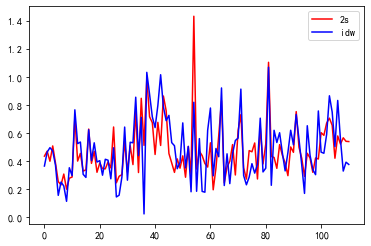

In [44]:
plt.plot(v_array[:,2]/v_array[:,1],'r',label = "2s")
plt.plot(v_array[:,3]/v_array[:,1],"b",label = "idw")
plt.legend()

In [45]:
np.argmin(v_array[:,2]/v_array[:,1])

61

In [46]:
np.mean(v_array[:,3]/v_array[:,1])

0.48306839592155537

In [48]:
v_array[61,:]

array([7.45044000e+05, 7.65999069e+01, 1.49944000e+01, 2.26262016e+01])

In [50]:
sta_1id = meb.in_id_list(sta_all,[745044])

In [51]:
sta_1id

,level,time,dtime,id,lon,lat,ob,e_idw,e_2s
3744,0,2019-05-12 12:00:00,0,745044,114.04,28.013,0.0000,0.0000,-0.0000
14021,0,2019-05-12 13:00:00,0,745044,114.04,28.013,0.0000,0.0000,-0.0013
24303,0,2019-05-12 14:00:00,0,745044,114.04,28.013,0.2000,-0.1212,-0.1199
34595,0,2019-05-12 15:00:00,0,745044,114.04,28.013,1.8000,0.5626,0.7196
44899,0,2019-05-12 16:00:00,0,745044,114.04,28.013,0.6000,-0.1846,-0.1628
55223,0,2019-05-12 17:00:00,0,745044,114.04,28.013,0.6000,-0.2189,-0.0606
65559,0,2019-05-12 18:00:00,0,745044,114.04,28.013,3.1000,-0.0902,-0.3557
75924,0,2019-05-12 19:00:00,0,745044,114.04,28.013,5.1000,0.4232,-0.4948
86293,0,2019-05-12 20:00:00,0,745044,114.04,28.013,2.6000,0.0067,0.2692
96662,0,2019-05-12 21:00:00,0,745044,114.04,28.013,0.4000,-0.3253,0.1680


In [55]:
time_list = []
time0 = times
while time0 <= timee:
    time_list.append(time0)
    time0 += datetime.timedelta(hours = 1)    

In [65]:
timestrs = mpd.program.fun.get_time_str_list(time_list,row = 2)

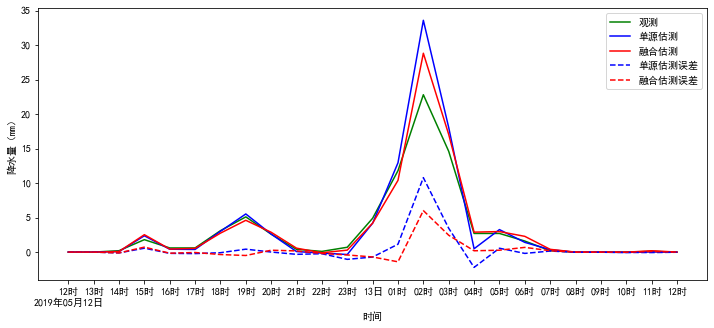

In [74]:
fig = plt.figure(figsize = (12,5))
x = np.arange(len(sta_1id.index))
plt.plot(x,sta_1id["ob"],"g",label = "观测")
plt.plot(x,sta_1id["e_idw"] + sta_1id["ob"],"b",label = "单源估测")
plt.plot(x,sta_1id["e_2s"]+ sta_1id["ob"],"r",label = "融合估测")

plt.plot(x,sta_1id["e_idw"],"b",label = "单源估测误差",linestyle = "--")
plt.plot(x,sta_1id["e_2s"],"r",label = "融合估测误差",linestyle = "--")
plt.xticks(x,timestrs)
plt.legend()
plt.xlabel("时间")
plt.ylabel("降水量（mm）")
save_path = r"G:\radar_hybird_china\test\e_list.png"
file1,extension = os.path.splitext(save_path)
extension = extension[1:]
plt.savefig(save_path,format = extension)

In [78]:
sta_onetime = meb.in_time_list(sta_all,[datetime.datetime(2019,5,13,0,0)])
sta_onetime["e_idw"] = np.abs(sta_onetime["e_idw"])
sta_onetime["e_2s"] = np.abs(sta_onetime["e_2s"])

s:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
s:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
sta_onetime.mean()

level         0.000000
dtime         0.000000
id       732582.816403
lon         116.889548
lat          28.272486
ob            0.651850
e_idw         0.356688
e_2s          0.364238
dtype: float64

In [82]:
grid2 = meb.get_grid_of_data(qpe_2s)
rain24_grd = meb.interp_sg_idw(rain24,grid2)

In [83]:
error_grd = meb.interp_sg_idw(err24,grid2)

s:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
s:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:51: RuntimeWarning: invalid value encountered in minimum
  return getattr(obj, method)(*args, **kwds)


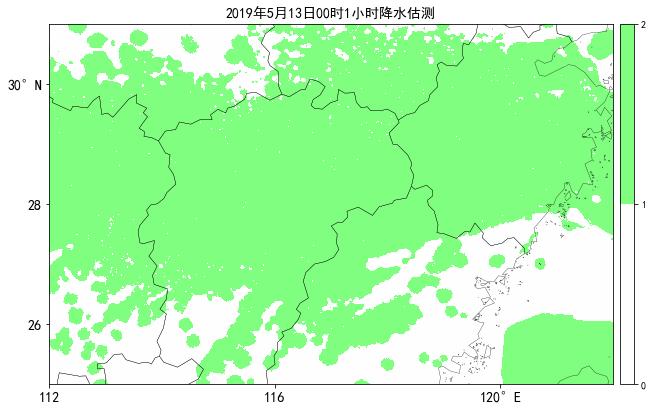

In [84]:
meb.plot_tools.pcolormesh_2d_grid(rain24_grd,save_path=  r"G:\radar_hybird_china\test\rain24.png",
                                title="2019年5月13日12时24小时降水量",clevs= clev1,cmap= cmap1,show = True)

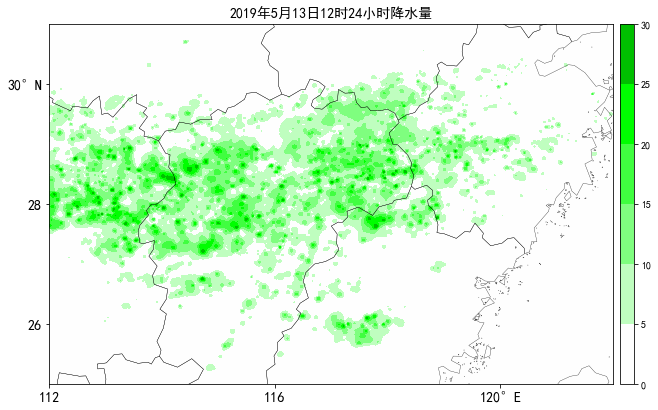

In [105]:
err24["e_2s"] = np.abs(err24["e_2s"])+1e-6
err24 = meb.between_value_range(err24,0.001,30)
grd_err = meb.interp_sg_idw(err24,grid2)
meb.plot_tools.contourf_2d_grid(grd_err,save_path=  r"G:\radar_hybird_china\test\err24.png",
                                title="2019年5月13日12时24小时降水量",clevs= clev1,cmap= cmap1,show = True)

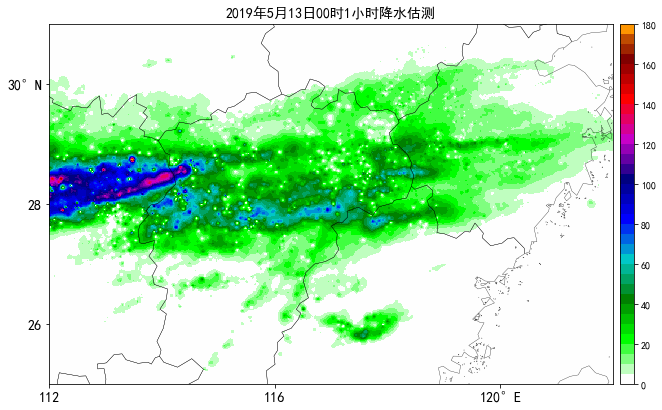

In [87]:
clev1,cmap1 = meb.tool.color_tools.clev_cmap_rain_24h()
time_list = []
time0 = times
timee = times + datetime.timedelta(hours = 24)
rain24 = None
while time0 < timee:
    time_list.append(time0)
    path = meb.get_path(r"G:\radar_hybird_china\qpe_2s\001h_v1\YYMMDDHH.bt.nc",time0)
    qpe_2s = meb.read_griddata_from_nc(path)
    if rain24 is None:
        rain24 = qpe_2s
    else:
        rain24.values += qpe_2s.values
    time0 += datetime.timedelta(hours = 1)  
meb.plot_tools.pcolormesh_2d_grid(rain24,save_path=  r"G:\radar_hybird_china\test\qpe_2s.png",
                                title="2019年5月13日12时24小时降水估测",clevs= clev1,cmap= cmap1,show = True)

In [93]:
err24

,level,time,dtime,id,lon,lat,e_2s
0,0,2019-05-12 12:00:00,0,57377,112.212,30.993,0.092501
1,0,2019-05-12 12:00:00,0,57387,113.132,31.000,0.034401
2,0,2019-05-12 12:00:00,0,57475,112.904,30.401,0.736401
3,0,2019-05-12 12:00:00,0,57476,112.150,30.350,0.824701
4,0,2019-05-12 12:00:00,0,57477,112.225,30.075,3.174701
5,0,2019-05-12 12:00:00,0,57481,113.567,30.950,0.139001
6,0,2019-05-12 12:00:00,0,57482,113.950,30.900,0.205301
7,0,2019-05-12 12:00:00,0,57483,113.134,30.669,2.828501
8,0,2019-05-12 12:00:00,0,57484,112.549,30.736,0.363001
9,0,2019-05-12 12:00:00,0,57485,113.467,30.283,0.108901


In [102]:
np.mean(rain24)

<xarray.DataArray 'data0' ()>
array(11.959804, dtype=float32)

In [104]:
np.mean(grd_err)/np.mean(rain24)

<xarray.DataArray 'data0' ()>
array(0.296563)